In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', 100)

In [3]:
data = pd.read_csv("Clientes_limpio.csv")

In [4]:
def createDummies(data,var_name):
    dummy = pd.get_dummies(data[var_name], prefix=var_name)
    data = data.drop(var_name, axis = 1)
    data = pd.concat([data, dummy ], axis = 1)
    return data

In [5]:
data = pd.concat([data, data["Escuela_Nuevos Horizontes"]], axis = 1, sort=False)

In [6]:
data = createDummies(data, "Semanas")

In [7]:
data.shape

(146, 26)

In [8]:
data.head()

,Edad,Grupo,Hermanos,Compra,Genero_Alumno_Femenino,Genero_Alumno_Masculino,Paquete_Alimento,Paquete_Desconocido,Paquete_Normal,Genero_Tutor_Desconocido,Genero_Tutor_Femenino,Genero_Tutor_Masculino,Municipio_Aguascalientes,Municipio_Desconocido,Municipio_Jesus María,Municipio_Morelia,Municipio_San_Pedro_Garza_García,Municipio_jesus María,Escuela_Desconocido,Escuela_Entorno,Escuela_Nuevos Horizontes,Escuela_Nuevos Horizontes,Semanas_1.0,Semanas_2.0,Semanas_2.5138888888888893,Semanas_3.0
0,4.000000,1.000000,0,Si,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
1,9.690722,1.865979,0,No,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
2,12.000000,3.000000,1,Si,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
3,8.000000,1.000000,0,Si,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
4,9.690722,1.865979,0,No,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1


In [9]:
data["Compra"] = (data["Compra"]=="Si").astype(int) #Values will be binary

In [10]:
data["Compra"].unique()

array([1, 0])

In [11]:
data["Compra"].value_counts()

1    108
0     38
Name: Compra, dtype: int64

In [12]:
data.groupby("Compra").mean()

,Edad,Grupo,Hermanos,Genero_Alumno_Femenino,Genero_Alumno_Masculino,Paquete_Alimento,Paquete_Desconocido,Paquete_Normal,Genero_Tutor_Desconocido,Genero_Tutor_Femenino,Genero_Tutor_Masculino,Municipio_Aguascalientes,Municipio_Desconocido,Municipio_Jesus María,Municipio_Morelia,Municipio_San_Pedro_Garza_García,Municipio_jesus María,Escuela_Desconocido,Escuela_Entorno,Escuela_Nuevos Horizontes,Escuela_Nuevos Horizontes,Semanas_1.0,Semanas_2.0,Semanas_2.5138888888888893,Semanas_3.0
Compra,,,,,,,,,,,,,,,,,,,,,,,,,
0,9.82854,1.906403,0.552632,0.473684,0.526316,0.342105,0.026316,0.631579,0.815789,0.131579,0.052632,0.052632,0.921053,0.026316,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.342105,0.105263,0.026316,0.526316
1,9.64223,1.851756,0.685185,0.287037,0.712963,0.407407,0.009259,0.583333,0.138889,0.592593,0.268519,0.138889,0.824074,0.000000,0.018519,0.009259,0.009259,0.888889,0.101852,0.009259,0.009259,0.148148,0.074074,0.009259,0.768519


Text(0, 0.5, 'Proportion of clients')

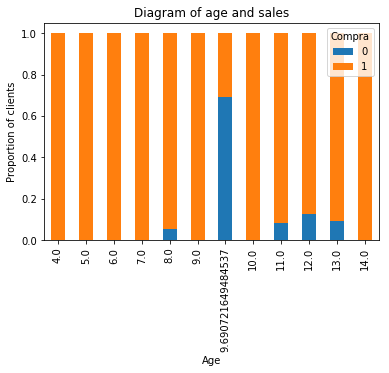

In [13]:
%matplotlib inline
table=pd.crosstab(data.Edad, data.Compra)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Diagram of age and sales")
plt.xlabel("Age")
plt.ylabel("Proportion of clients")

Text(0, 0.5, 'Frequency of the purchase')

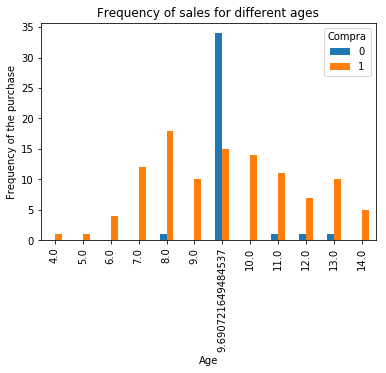

In [14]:
%matplotlib inline
table.plot(kind="bar", stacked=False)
plt.title("Frequency of sales for different ages")
plt.xlabel("Age")
plt.ylabel("Frequency of the purchase")

Text(0, 0.5, 'Proportion of clients')

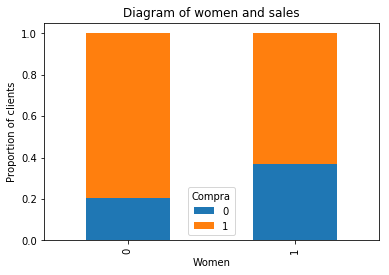

In [15]:
table=pd.crosstab(data.Genero_Alumno_Femenino, data.Compra)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Diagram of women and sales")
plt.xlabel("Women")
plt.ylabel("Proportion of clients")

Text(0, 0.5, 'Proportion of clients')

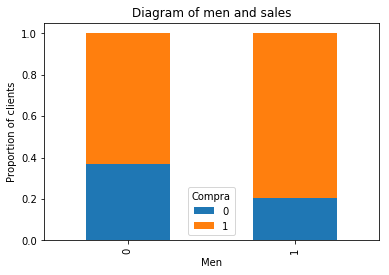

In [16]:
table=pd.crosstab(data.Genero_Alumno_Masculino, data.Compra)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Diagram of men and sales")
plt.xlabel("Men")
plt.ylabel("Proportion of clients")

Text(0, 0.5, 'Frequency of the purchase')

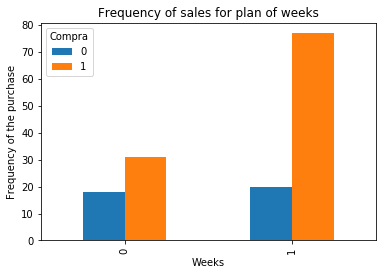

In [17]:
%matplotlib inline
table.plot(kind="bar", stacked=False)
plt.title("Frequency of sales for plan of weeks")
plt.xlabel("Weeks")
plt.ylabel("Frequency of the purchase")

Text(0, 0.5, 'Client')

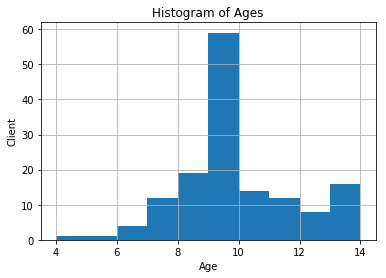

In [18]:
data.Edad.hist()
plt.title("Histogram of Ages")
plt.xlabel("Age")
plt.ylabel("Client")

In [19]:
data_vars = data.columns.values.tolist()

In [20]:
data_vars = data.columns.values.tolist()
Y = ['Compra']
X = [v for v in data_vars if v not in Y] 

In [21]:
X

['Edad',
 'Grupo',
 'Hermanos',
 'Genero_Alumno_Femenino',
 'Genero_Alumno_Masculino',
 'Paquete_Alimento',
 'Paquete_Desconocido',
 'Paquete_Normal',
 'Genero_Tutor_Desconocido',
 'Genero_Tutor_Femenino',
 'Genero_Tutor_Masculino',
 'Municipio_Aguascalientes',
 'Municipio_Desconocido',
 'Municipio_Jesus María',
 'Municipio_Morelia',
 'Municipio_San_Pedro_Garza_García',
 'Municipio_jesus María',
 'Escuela_Desconocido',
 'Escuela_Entorno',
 'Escuela_Nuevos Horizontes',
 'Escuela_Nuevos Horizontes',
 'Semanas_1.0',
 'Semanas_2.0',
 'Semanas_2.5138888888888893',
 'Semanas_3.0']

In [22]:
data[X].columns.values

array(['Edad', 'Grupo', 'Hermanos', 'Genero_Alumno_Femenino',
       'Genero_Alumno_Masculino', 'Paquete_Alimento',
       'Paquete_Desconocido', 'Paquete_Normal',
       'Genero_Tutor_Desconocido', 'Genero_Tutor_Femenino',
       'Genero_Tutor_Masculino', 'Municipio_Aguascalientes',
       'Municipio_Desconocido', 'Municipio_Jesus María',
       'Municipio_Morelia', 'Municipio_San_Pedro_Garza_García',
       'Municipio_jesus María', 'Escuela_Desconocido', 'Escuela_Entorno',
       'Escuela_Nuevos Horizontes', 'Escuela_Nuevos Horizontes',
       'Escuela_Nuevos Horizontes', 'Escuela_Nuevos Horizontes',
       'Semanas_1.0', 'Semanas_2.0', 'Semanas_2.5138888888888893',
       'Semanas_3.0'], dtype=object)

## Using linear regression to get the ranking

In [23]:
n = 10

In [24]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [25]:
lr = LogisticRegression(solver='lbfgs')

In [26]:
rfe = RFE(lr, n)
rfe = rfe.fit(data[X], data[Y].values.ravel())

In [27]:
print(rfe.support_)

[False False False False False  True False False  True  True  True False
  True  True False False False  True  True False False False False  True
 False False  True]


In [28]:
z=zip(data_vars,rfe.support_, rfe.ranking_)

In [29]:
list(z)

[('Edad', False, 5),
 ('Grupo', False, 17),
 ('Hermanos', False, 10),
 ('Compra', False, 3),
 ('Genero_Alumno_Femenino', False, 7),
 ('Genero_Alumno_Masculino', True, 1),
 ('Paquete_Alimento', False, 6),
 ('Paquete_Desconocido', False, 15),
 ('Paquete_Normal', True, 1),
 ('Genero_Tutor_Desconocido', True, 1),
 ('Genero_Tutor_Femenino', True, 1),
 ('Genero_Tutor_Masculino', False, 16),
 ('Municipio_Aguascalientes', True, 1),
 ('Municipio_Desconocido', True, 1),
 ('Municipio_Jesus María', False, 8),
 ('Municipio_Morelia', False, 9),
 ('Municipio_San_Pedro_Garza_García', False, 18),
 ('Municipio_jesus María', True, 1),
 ('Escuela_Desconocido', True, 1),
 ('Escuela_Entorno', False, 11),
 ('Escuela_Nuevos Horizontes', False, 12),
 ('Escuela_Nuevos Horizontes', False, 13),
 ('Semanas_1.0', False, 14),
 ('Semanas_2.0', True, 1),
 ('Semanas_2.5138888888888893', False, 2),
 ('Semanas_3.0', False, 4)]

In [30]:
cols = ["Genero_Alumno_Masculino", "Paquete_Normal", "Genero_Tutor_Desconocido", "Genero_Tutor_Femenino",
       "Municipio_Desconocido", "Municipio_jesus María", "Escuela_Desconocido", 
        "Semanas_2.0"]

In [31]:
X = data[cols]+0.00001*np.random.rand(146, 8) #add noise so there is not a singular matrix
Y = data["Compra"]

## Using stats model 

In [32]:
import statsmodels.api as sm

In [33]:
logit_model = sm.Logit(Y, X)

In [34]:
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.369063
         Iterations 16


In [35]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
===========================================================================
Model:                  Logit               Pseudo R-squared:    0.356     
Dependent Variable:     Compra              AIC:                 123.7664  
Date:                   2019-05-01 19:47    BIC:                 147.6352  
No. Observations:       146                 Log-Likelihood:      -53.883   
Df Model:               7                   LL-Null:             -83.708   
Df Residuals:           138                 LLR p-value:         1.7731e-10
Converged:              1.0000              Scale:               1.0000    
No. Iterations:         16.0000                                            
---------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|    [0.025   0.975] 
---------------------------------------------------------------------------
Genero_Alumno_Masculino   0.5920   0.4796  1.2342 0.2171   -0.3481   1.5320
Paquete_Normal            0.2910   0.4858  0.5989 0.5492   -0.6612   1.2431
Genero_Tutor_Desconocido -3.3142   0.8194 -4.0448 0.0001   -4.9202  -1.7083
Genero_Tutor_Femenino     0.6377   0.7787  0.8190 0.4128   -0.8884   2.1639
Municipio_Desconocido     1.6704   0.6722  2.4852 0.0129    0.3530   2.9878
Municipio_jesus María    10.8413 351.4753  0.0308 0.9754 -678.0375 699.7202
Escuela_Desconocido       0.4424   0.8399  0.5268 0.5984   -1.2038   2.0886
Semanas_2.0              -0.7276   0.8956 -0.8124 0.4166   -2.4829   1.0277
===========================================================================

"""

In [36]:
from sklearn import linear_model

In [37]:
logit_model = linear_model.LogisticRegression(solver = "lbfgs")
logit_model.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [38]:
logit_model.score(X,Y)

0.8493150684931506

In [39]:
1-Y.mean()

0.26027397260273977

In [40]:
pd.DataFrame(list(zip(X.columns, np.transpose(logit_model.coef_))))

,0,1
0,Genero_Alumno_Masculino,[0.33545010464817676]
1,Paquete_Normal,[-0.023689731932405245]
2,Genero_Tutor_Desconocido,[-2.339053499327886]
3,Genero_Tutor_Femenino,[0.6303432110079238]
4,Municipio_Desconocido,[0.355098746802456]
5,Municipio_jesus María,[0.07760470323176678]
6,Escuela_Desconocido,[-0.7414192340343823]
7,Semanas_2.0,[-0.4690298460419286]


## Curva ROC

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=0)

In [43]:
lm = linear_model.LogisticRegression(solver = "lbfgs")
lm.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [44]:
probs = lm.predict_proba(X_test)

In [45]:
prob=probs[:,1]
prob_df = pd.DataFrame(prob)
threshold = 0.5
prob_df["prediction"] = np.where(prob_df[0]>=threshold, 1, 0)
prob_df["actual"] = list(Y_test)
prob_df.head()

,0,prediction,actual
0,0.893606,1,1
1,0.851938,1,1
2,0.920167,1,1
3,0.843779,1,1
4,0.415222,0,0


In [46]:
confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)
confusion_matrix

actual,0,1
prediction,,
0,8,1
1,1,34


In [47]:
TN=confusion_matrix[0][0]
TP=confusion_matrix[1][1]
FN=confusion_matrix[0][1]
FP=confusion_matrix[1][0]

In [48]:
TN

8

In [49]:
TP

34

In [50]:
FN

1

In [51]:
FP

1

In [52]:
sens = TP/(TP+FN)
sens

0.9714285714285714

In [53]:
espc_1 = 1-TN/(TN+FP)
espc_1

0.11111111111111116

In [54]:
thresholds = [0.04, 0.05, 0.07, 0.10, 0.12, 0.15, 0.18, 0.20, 0.25, 0.3, 0.4, 0.5]
sensitivities = [1]
especifities_1 = [1]

for t in thresholds:
    prob_df["prediction"] = np.where(prob_df[0]>=t, 1, 0)
    prob_df["actual"] = list(Y_test)
    prob_df.head()

    confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)
    
    sens = TP/(TP+FN)
    sensitivities.append(sens)
    espc_1 = 1-TN/(TN+FP)
    especifities_1.append(espc_1)

sensitivities.append(0)
especifities_1.append(0)

#Inicia desde 1 y termina en 0. Decrece

In [55]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Curva ROC')

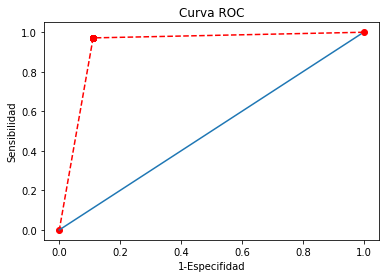

In [56]:
%matplotlib inline
plt.plot(especifities_1, sensitivities, marker="o", linestyle="--", color="r")
x=[i*0.01 for i in range(100)]
y=[i*0.01 for i in range(100)]
plt.plot(x,y)
plt.xlabel("1-Especifidad")
plt.ylabel("Sensibilidad")
plt.title("Curva ROC")